In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd

from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline

#### Load data

In [3]:
data = scipy.io.loadmat('ex7data1.mat')

In [4]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 3.38156267,  3.38911268],
        [ 4.52787538,  5.8541781 ],
        [ 2.65568187,  4.41199472],
        [ 2.76523467,  3.71541365],
        [ 2.84656011,  4.17550645],
        [ 3.89067196,  6.48838087],
        [ 3.47580524,  3.63284876],
        [ 5.91129845,  6.68076853],
        [ 3.92889397,  5.09844661],
        [ 4.56183537,  5.62329929],
        [ 4.57407171,  5.39765069],
        [ 4.37173356,  5.46116549],
        [ 4.19169388,  4.95469359],
        [ 5.24408518,  4.66148767],
        [ 2.8358402 ,  3.76801716],
        [ 5.63526969,  6.31211438],
        [ 4.68632968,  5.6652411 ],
        [ 2.85051337,  4.62645627],
        [ 5.1101573 ,  7.36319662],
        [ 5.18256377,  4.64650909],
        [ 5.70732809,  6.68103995],
        [ 3.57968458,  4.80278074],
        [ 5.63937773,  6.12043594],
        [ 4.26346851,  4.689

In [5]:
df = pd.DataFrame(np.c_[data['X']])
df.head()

,0,1
0,3.381563,3.389113
1,4.527875,5.854178
2,2.655682,4.411995
3,2.765235,3.715414
4,2.846560,4.175506


#### Plot data

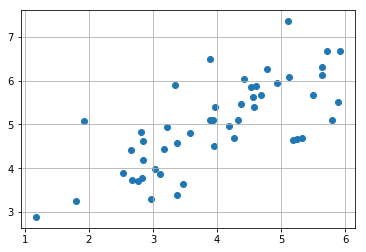

In [6]:
def plotData(x, y):
    plt.scatter(x, y)
    plt.grid()
plotData(df[0], df[1])

### Write your own PCA algorithm

You need to find two principal components.
Your tasks are to draw to PCs and find orthogonal projections from some point to a given PCs.

If you are importing the PCA from sklearn, you get only 50%

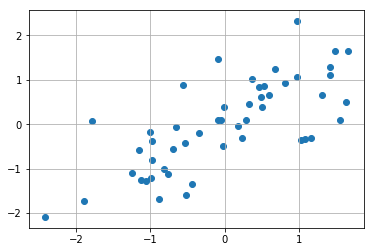

In [7]:
scaler = StandardScaler()
scaler.fit(df)
scaled = scaler.transform(df)
plotData(scaled[:,0], scaled[:,1])

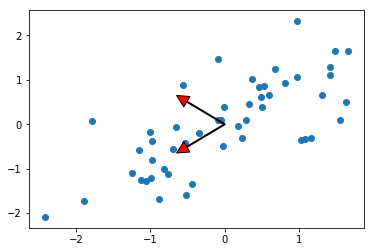

In [10]:
eigenvectors, eigenvalues, V = np.linalg.svd(scaled.T, full_matrices=False)
projected_data = np.dot(scaled, eigenvectors)
sigma = projected_data.std(axis=0).mean()
mean = scaled.mean(axis=0)

for axis in eigenvectors:
    start, end = mean, mean + sigma * axis
    plt.annotate('', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=1.0))

plt.scatter(scaled[:,0], scaled[:,1])
plt.show()

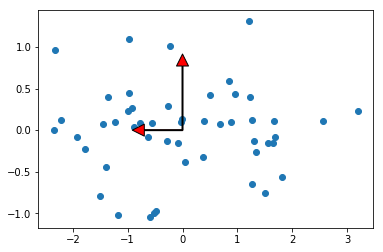

In [99]:
eigenvectors, eigenvalues, V = np.linalg.svd(scaled.T, full_matrices=False)

axis1 = eigenvectors[1]
scaled1 = scaled.copy()
scaled1 = np.dot(scaled1, eigenvectors)

eigenvectors, eigenvalues, V = np.linalg.svd(scaled1.T, full_matrices=False)
projected_data = np.dot(scaled1, eigenvectors)
sigma = projected_data.std(axis=0).mean()
mean = scaled1.mean(axis=0)

for axis in eigenvectors:
    start, end = mean, mean + sigma * axis
    plt.annotate('', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=1.0))


plt.scatter(scaled1[:,0], scaled1[:,1])
plt.show()

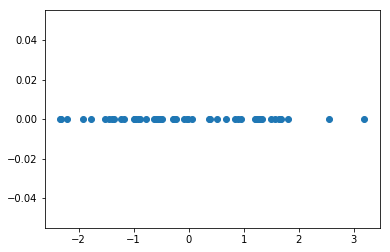

In [118]:
plt.plot(projected_data[:,0], np.zeros_like(projected_data[:,0]), 'o')
plt.show()

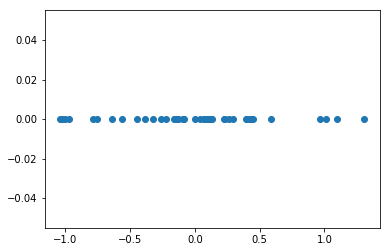

In [119]:
plt.plot(projected_data[:,1], np.zeros_like(projected_data[:,1]), 'o')
plt.show()